In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
$

$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\At}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wt}{\wb^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\lambda_i}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

$
\newcommand{\zerob}{\pmb{0}}
$


aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$

$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

# Intro

X has a $\chi^2$ distribution with $k$ degrees of freedom,
written $X ~ \sim ~ \chi_p^2$ if,

$f(x) = \frac{1}{2^{\frac{k}{2}} \Gamma\left(\frac{k}{2}\right)}\;
x^{\frac{k}{2}-1} e^{-\frac{x}{2}}\,$

If $Z_1, \cdots, Z_n$ are independent standard Normal RV's, then 

$\sum_{i=1}^{n} Z_i^2 ~ \sim ~~~ \chi_k^2$ 

# Wolfram
From [wolfram](http://mathworld.wolfram.com/Chi-SquaredDistribution.html)  
* This makes the $\chi^2$ distribution a gamma distribution with scale parameter $\theta=2$ and shape parameter $\alpha=k/2$.  
* For $r \le 2$, f(x) is monotonically decreasing.  
* For $r \ge 3$, it has a maximum at $r-2$

# Somewhere
From [somewhere](http://www.math.uah.edu/stat/special/ChiSquare.html) ($k$ is referred as $n$ here)
1. $0 \lt k \lt 2$, f(x) is monotonically decreasing, with $f(x) \rightarrow \infty$ as $x \downarrow 0$
2. $k=2$: $f$ is decreasing with $f(0) = \frac{1}{2}$
3. $k > 2$, $f$ increases and then decreases with mode at $n-2$
4. $0 \lt k \le 2$, $f$ is concave downward
5. $2 \lt k \le 4$, $f$ is concave downward and then upward with the inflection point at $n - 2 + \sqrt{2n-4}$
6. $k \gt 4$, $f$ is concave upward, then downward and then upward with the inflection points at $n - 2 \pm \sqrt{2n-4}$

# Khan Academy
From [khan academy](https://www.khanacademy.org/math/probability/statistics-inferential/chi-square/)
* the curves show the probability of $x$ occurring
* for $k=1$, there is a high probability of a value occurring close to zero. 
* for $k=1$, it is just $0.5$

# Titbits
* Rarely used to model natural phenomena
* Used extensively in hypothesis testing because of its relationship to the normal distribution
* Should be used if the large sample size. If the sample size is small, t-distribution is preferred [why?]

# Statistics  
Mean: $k$  
Variance: $2k$

# Uses

1. [chi-squared test](https://www.wikiwand.com/en/Chi-squared_test)  for goodness of fit of an observed distribution to a theoretical one.
2. independence of two criteria of classification of qualitative data
3. confidence interval estimation for a population standard deviation of a normal distribution from a sample std. deviation
4. [Likelihood-ratio test](https://www.wikiwand.com/en/Likelihood-ratio_test) for nested models

/Users/dragon/Library/Python/3.5/lib/python/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


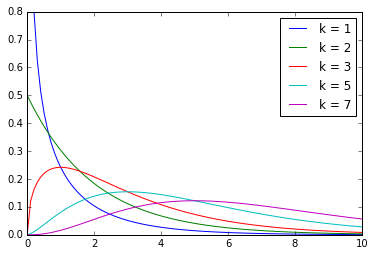

In [2]:
def compute_chi_squared(x, k):
    nr = x**(k/2. - 1) * (math.e**(-x/2.))
    dr = (2**(k/2.)) * (math.gamma(k/2.))
    return nr/dr

def show_chi_squared(k):
    x = np.linspace(0, 10, 100)
    y = [compute_chi_squared(xx, k) for xx in x]
    plt.plot(x, y, label='k = ' + str(k))

k = [1,2,3,5,7]
[show_chi_squared(kk) for kk in k]
plt.legend(loc='upper right')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,0.8))
plt.show()